In [6]:
from google.colab import files
uploaded = files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv
Saving sign_mnist_test.csv to sign_mnist_test (1).csv


### **Sign language detection using convolutional neural networks**

this is the source code for the project(ANN and Fuzzy logic) submitted by

    Ershaad Parambath - B190857EE
    Anugrah R - B191126EE
    Sahad Usman - B190854EE

dataset: Sign Language MNIST

In [8]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import random
import pandas as pd



### **Pre processing of data**

We process the csv data into a numpy array inorder to fit in the convolutional neural network.

In [7]:
train = pd.read_csv('/content/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test.csv')

labels = train['label'].values
train.drop('label', axis = 1, inplace = True)


In [9]:
unique_val = np.array(labels)

Reshape our data into 28 x 28

In [10]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [11]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)


In [12]:
#show labels
labels


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [17]:
mapping_letter = {}
A = "ABCDEFGHIKLMNOPQRSTUVWXY"
for i,l in enumerate(A):
    mapping_letter[l] = i
mapping_letter = {v:k for k,v in mapping_letter.items()}

### **Visualization of the data**

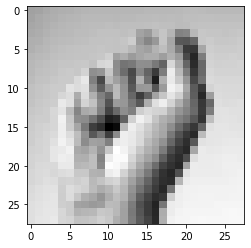

In [18]:
n = random.randint(0,2000)
plt.imshow(images[n].reshape(28,28), cmap='gray')
A = "ABCDEFGHIKLMNOPQRSTUVWXY"

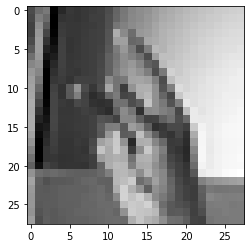

In [19]:
n = random.randint(0,2000)
plt.imshow(images[n].reshape(28,28), cmap='gray')
A = "ABCDEFGHIKLMNOPQRSTUVWXY"

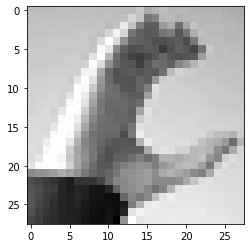

In [20]:
n = random.randint(0,2000)
plt.imshow(images[n].reshape(28,28), cmap='gray')
A = "ABCDEFGHIKLMNOPQRSTUVWXY"

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [22]:
#scaling our data
x_train = x_train / 255
x_valid = x_valid / 255

In [23]:
#reshaping foor tensorflow
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)



In [24]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                
                                    tf.keras.layers.Dense(24, activation = 'softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [25]:
#model compilation
model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics = ['accuracy'])


### **Training of our model**

In [26]:
history = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs = 10, batch_size =128 )

Epoch 1/10
151/151 [==============================] - 31s 197ms/step - loss: 2.4911 - accuracy: 0.2329 - val_loss: 1.3193 - val_accuracy: 0.5997
Epoch 2/10
151/151 [==============================] - 30s 197ms/step - loss: 1.0575 - accuracy: 0.6435 - val_loss: 0.6512 - val_accuracy: 0.8030
Epoch 3/10
151/151 [==============================] - 29s 195ms/step - loss: 0.6099 - accuracy: 0.7974 - val_loss: 0.4209 - val_accuracy: 0.8622
Epoch 4/10
151/151 [==============================] - 31s 204ms/step - loss: 0.3988 - accuracy: 0.8712 - val_loss: 0.2660 - val_accuracy: 0.9139
Epoch 5/10
151/151 [==============================] - 29s 194ms/step - loss: 0.2523 - accuracy: 0.9197 - val_loss: 0.1558 - val_accuracy: 0.9559
Epoch 6/10
151/151 [==============================] - 29s 195ms/step - loss: 0.1604 - accuracy: 0.9534 - val_loss: 0.0905 - val_accuracy: 0.9825
Epoch 7/10
151/151 [==============================] - 30s 196ms/step - loss: 0.1165 - accuracy: 0.9658 - val_loss: 0.0620 - val_ac

In [27]:
model.save("model_to_be_finalized.h5")

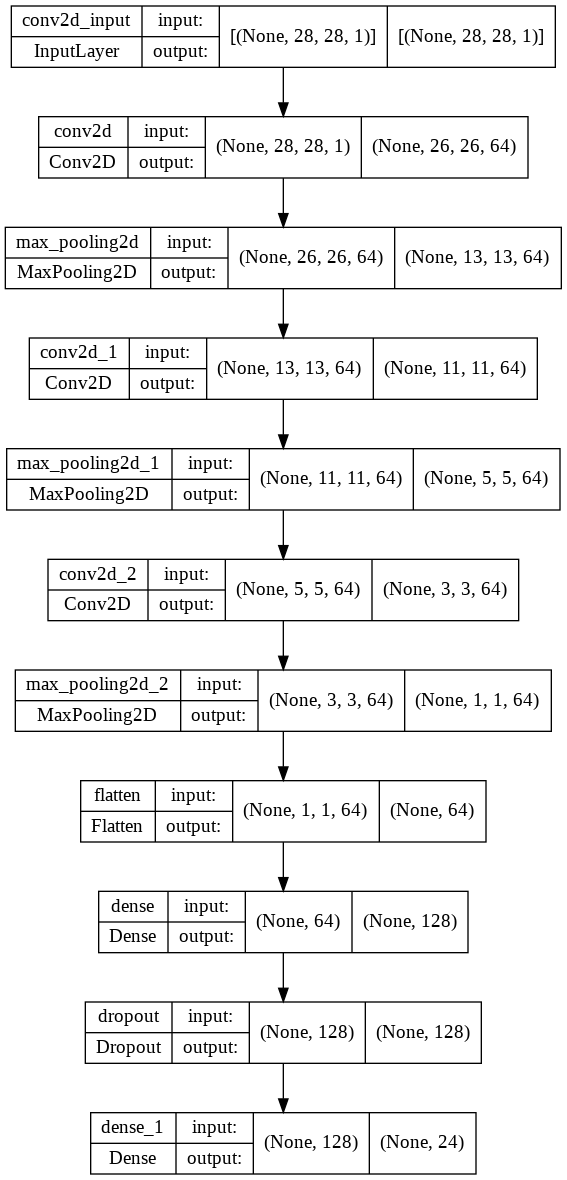

In [28]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True,show_dtype=False,show_layer_names=True,rankdir="TB",expand_nested=True,dpi=96)

### **Training Analysis**

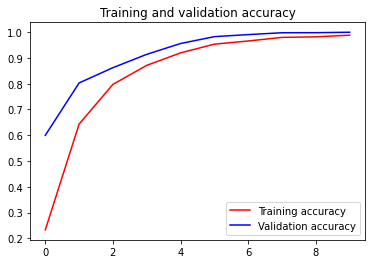

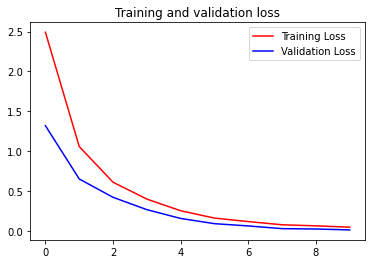

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



### **Testing/Predicting of the model**

In [54]:
test = pd.read_csv('/content/sign_mnist_test.csv')
test.head()

from sklearn.metrics import accuracy_score,confusion_matrix

In [55]:
labels = test['label'].values
test.drop('label', axis = 1, inplace = True)
unique_val = np.array(labels)

images = test.values
images = np.array([np.reshape(i, (28, 28,1)) for i in images])
#images = np.array([i.flatten() for i in images])

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)


In [56]:
predictions = model.predict(images)
predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [57]:
unique_labels = [ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20, 21, 22, 23, 24]
unique_labels = np.array(unique_labels)

      

def predictions_to_labels(pred):
    labels =[]
    for p in pred:
        labels.append(unique_labels[np.argmax(p)])
    return labels



y_pred_labels = predictions_to_labels(predictions)
y_test_labels = predictions_to_labels(labels)



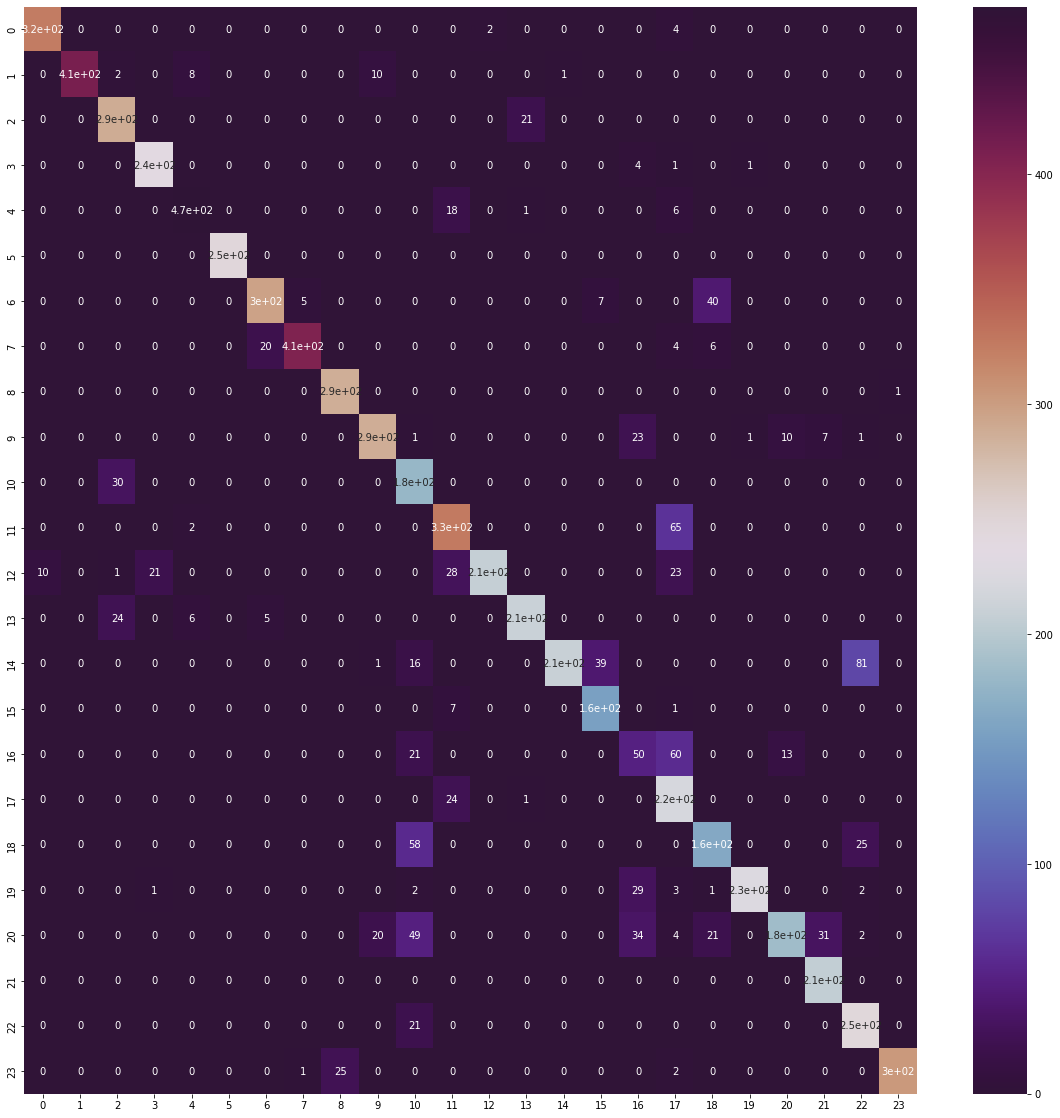

In [59]:
import seaborn as sns
cm= confusion_matrix(y_test_labels,y_pred_labels)
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,cmap='twilight_shifted')



At the end, most of our predictions were right. We can see that by looking at the Confusion Matrix diagonal